### Método de diferencias finitas para resolver ecuaciones diferencias parciales

##### Condiciones variables en los bordes

Resolver la sig ec. diferencial parcial con una derivada en el borde izquierdo.

$u(x,t):\frac{\partial ²u}{\partial x²}=k\frac{\partial u}{\partial t}$  , $0<=x<=1, t>=0$
    
$\frac{\partial u(0,t)}{\partial x}=-5 ,$ $   t>=0$

$u(1,t)=60, $ $  t>=0$

$ u(x,0)=40, $ 0<x<1 $

$\Delta x=0.1, \Delta t=0.1, k=4$

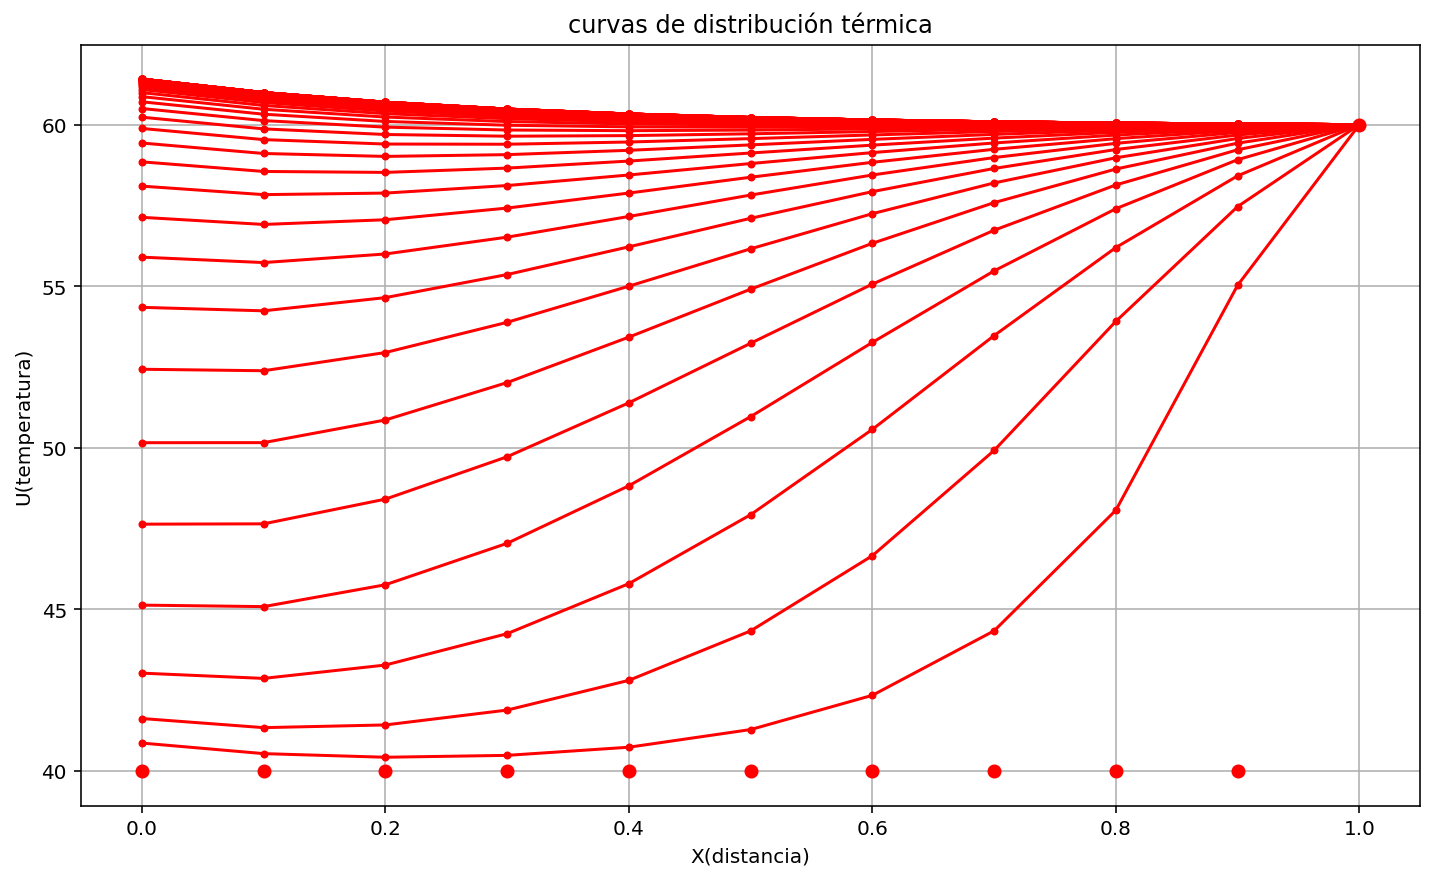

In [3]:
from tridiagonal import*
def edpdifpid(P,Q,R,U,der0,dx,m):
    #Método de diferencias finitas  implicito
    a=[];b=[];c=[];d=[]
    for i in range(m-1):
        a=a+[P]
        b=b+[Q]
        c=c+[R]
        d=d+[-U[i+1]]
    c[0]=P+R
    d[0]=d[0]+2*dx*P*der0
    d[m-2]=d[m-2]-c[m-2]*U[m-1]
    u=tridiagonal(a,b,c,d)
    U=u+[U[m-1]]
    return U
from pylab import*
m=11       #numero de ecuaciones
n=50       #numero de niveles en t
der0=-5    #derivada en el borde izquierdo
Tb=60      #condiciones en los bordes
To=40      #condiciones en el inicio
dx=0.1     #incrementos
dt=0.1
L=1        #longitud
k=4        #dato especificado
U=[]       #asignacion incial
for i in range(m-1):
    U=U+[To]
U=U+[Tb]
lamb=dt/(k*dx**2)
P=lamb
Q=-1-2*lamb
R=lamb
title('curvas de distribución térmica')
xlabel('X(distancia)')
ylabel('U(temperatura)')
x=[]
for i in range(m):
    x=x+[i*dx]          # coordenadas para el gráfico
plot(x,U,'or')          #distribución inicial
for j in range(n):
    U=edpdifpid(P,Q,R,U,der0,dx,m)
    plot(x,U,'-r');     #curvas cada 5 niveles de t
    plot(x,U,'.r')
grid(True)
show()

Resolver la sig ec. diferencial parcial con una derivada en el borde izquierdo.

$u(x,t):\frac{\partial ²u}{\partial x²}=k\frac{\partial u}{\partial t}$  , $0<=x<=1, t>=0$
    
$\frac{\partial u(0,t)}{\partial x}=-5 ,$ $   t>=0$

$u(1,t)=20+10sen(t), $ $  t>=0$

$ u(x,0)=40x, $ 0<x<1 $

$\Delta x=0.25, \Delta t=0.1, k=4$

[0.0, 10.0, 20.0, 30.0, 20]


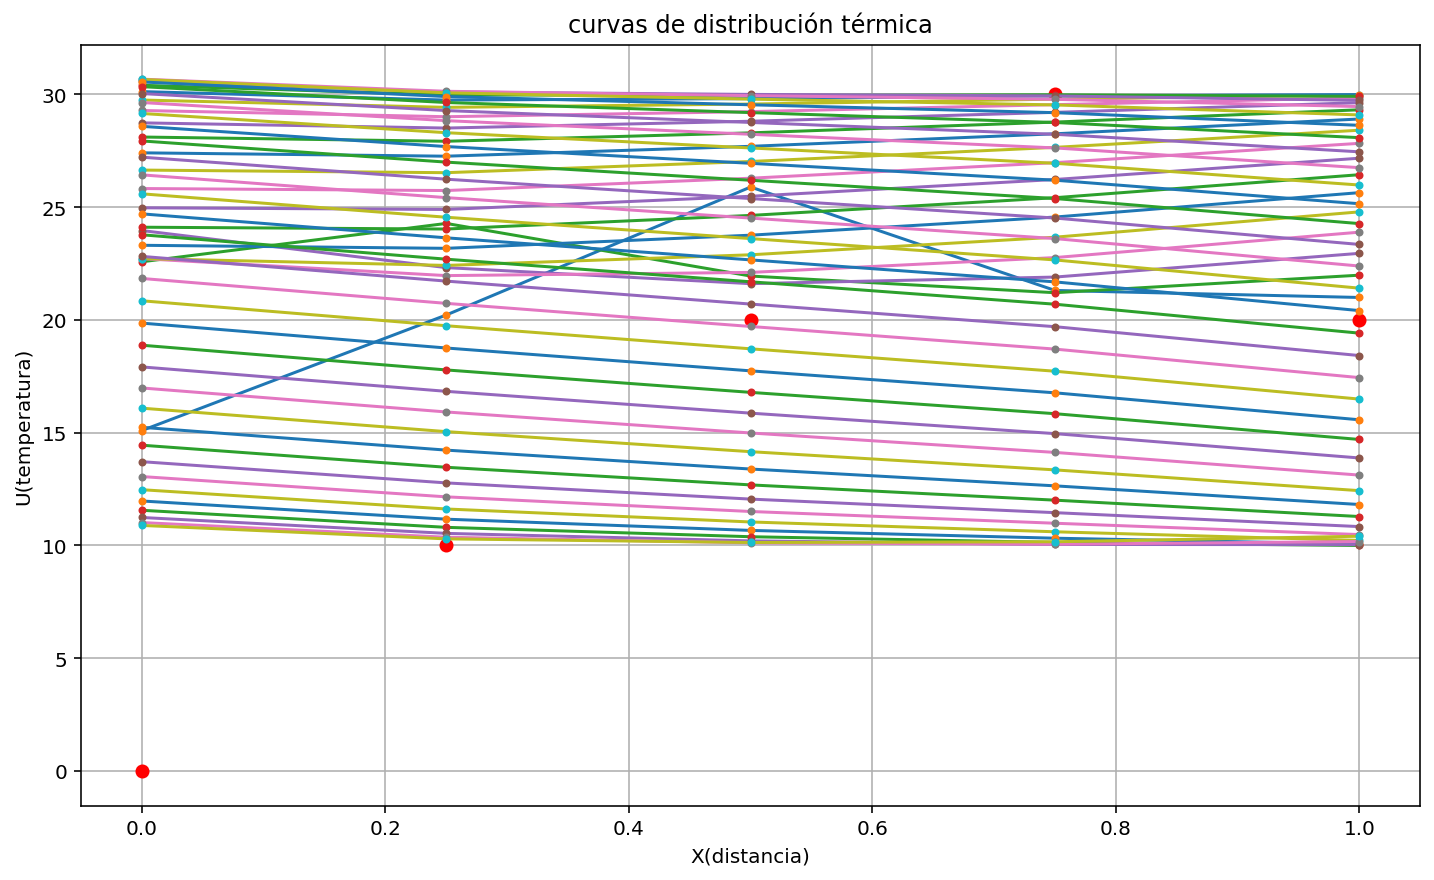

In [22]:
from tridiagonal import*
import numpy as np
def edpdifpid(P,Q,R,U,der0,dx,m):
    #Método de diferencias finitas  implicito
    a=[];b=[];c=[];d=[]
    for i in range(m-1):
        a=a+[P]
        b=b+[Q]
        c=c+[R]
        d=d+[-U[i+1]]
    c[0]=P+R
    d[0]=d[0]+2*dx*P*der0
    d[m-2]=d[m-2]-c[m-2]*U[m-1]
    u=tridiagonal(a,b,c,d)
    U=u
    return U
from pylab import*
m=5      #numero de ecuaciones m-1
n=50       #numero de niveles en t
der0=-5    #derivada en el borde izquierdo
L=1
t=np.arange(0,50,50)
x=np.arange(0,1,11)
Tb=20+10*np.sin(t)      #condiciones en los bordes
To=40*x      #condiciones en el inicio
dx=L/float(m-1)    #incrementos
dt=0.1
L=1        #longitud
k=4        #dato especificado
U=[]       #asignacion incial
for i in range(m-1):
    U=U+[40*i*dx]
U=U+[20]
print(U)
lamb=dt/(k*dx**2)
P=lamb
Q=-1-2*lamb
R=lamb
title('curvas de distribución térmica')
xlabel('X(distancia)')
ylabel('U(temperatura)')
x=[]
for i in range(m):
    x=x+[i*dx]          # coordenadas para el gráfico
plot(x,U,'or')          #distribución inicial
for j in range(n):
    U=edpdifpid(P,Q,R,U,der0,dx,m)
    #print(U)
    U=U+[20+10*np.sin((j+1)*dt)]
    plot(x,U,'-');     #curvas cada 5 niveles de t
    plot(x,U,'.')
grid(True)
show()